In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [155]:
df = pd.read_csv('tv-cast.csv')

In [156]:
df.head()

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y,lead_notes,support_notes,show_notes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,2,0,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,0,0,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,2,7,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."


In [157]:
df.shape

(248, 15)

In [158]:
df.isnull().sum()

Performer          0
Show               0
Show Start         0
Show End           0
Status?            0
CharEnd            0
Years Since        0
#LEAD              0
#SUPPORT           0
#Shows             0
Score              0
Score/Y            0
lead_notes       159
support_notes    113
show_notes       110
dtype: int64

In [159]:
df.drop(columns = ['lead_notes', 'support_notes', 'show_notes'], inplace = True)

In [160]:
df.head()

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,2,0,2,4.00,0.333333333
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,0,0,0,0.00,0
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,2,7,6,9.75,0.886363636


In [161]:
df.columns

Index(['Performer', 'Show', 'Show Start', 'Show End', 'Status?', 'CharEnd',
       'Years Since', '#LEAD', '#SUPPORT', '#Shows', 'Score', 'Score/Y'],
      dtype='object')

#### Let's change these column names

In [162]:
df.columns = df.columns.str.lower().str.replace('/', '_').str.replace(' ', '_').str.replace('#', '').str.replace('?', '')


In [163]:
df.columns

Index(['performer', 'show', 'show_start', 'show_end', 'status', 'charend',
       'years_since', 'lead', 'support', 'shows', 'score', 'score_y'],
      dtype='object')

#### Let's fix the status column

In [164]:
df['status'].value_counts()

END     202
LEFT     29
End      17
Name: status, dtype: int64

In [165]:
df['status'] = df['status'].map(lambda x: "END" if x == "End" else x)

#### Let's change the 'Status' category using a lambda function, so that we change the END class to a 0 and the LEFT class to a 1 

In [166]:
df['status'] = df['status'].map(lambda x: 1 if x == 'LEFT' else 0)

In [167]:
df['status'].dtypes

dtype('int64')

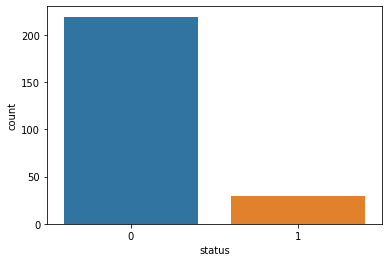

In [168]:
import seaborn as sns
sns.countplot(df['status'],label="Count")

In [169]:
df.head()

,performer,show,show_start,show_end,status,charend,years_since,lead,support,shows,score,score_y
0,Steven Hill,Law & Order,1990,2010,0,2000,15,0,0,0,0.00,0
1,Kelli Williams,The Practice,1997,2014,0,2003,12,0,1,6,6.25,0.520833333
2,LisaGay Hamilton,The Practice,1997,2014,0,2003,12,2,0,2,4.00,0.333333333
3,Lara Flynn Boyle,The Practice,1997,2014,0,2003,12,0,0,0,0.00,0
4,Dylan McDermott,The Practice,1997,2014,0,2004,11,2,7,6,9.75,0.886363636


In [177]:
df['show'].value_counts()

Deadwood                           24
Boardwalk Empire                   19
Big Love                           17
Friday Night Lights                16
True Blood                         15
The Sopranos                       13
Lost                               13
True Detective                     12
Heroes                             12
The West Wing                      11
ER                                 10
Dexter                              9
Joan of Arcadia                     9
House                               8
Six Feet Under                      8
Breaking Bad                        8
The Practice                        8
Boston Legal                        6
Homeland                            5
Game of Thrones                     5
Damages                             4
Law & Order                         4
24                                  3
Downton Abbey                       2
CSI: Crime Scene Investigations     2
Grey's Anatomy                      2
True Detecti

#### Let's review how to make dummy variables for the 'show' column and review how to Concat, Join and Merge!

In [172]:
shows = pd.get_dummies(df['show'])

In [175]:
shows.head()  #so now this is it's own dataframe

,24,Big Love,Boardwalk Empire,Boston Legal,Breaking Bad,CSI: Crime Scene Investigations,Damages,Deadwood,Dexter,Downton Abbey,...,Law & Order,Lost,Six Feet Under,The Practice,The Sopranos,The West Wing,True Blood,True Detective,True Detective -10,True Detective -29
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Join/Merge/Concat

##### Join columns with other DataFrame either on index or on a key column. - here we're going to join on index

In [176]:
joined=df.join(shows)
joined.head()

,performer,show,show_start,show_end,status,charend,years_since,lead,support,shows,...,Law & Order,Lost,Six Feet Under,The Practice,The Sopranos,The West Wing,True Blood,True Detective,True Detective -10,True Detective -29
0,Steven Hill,Law & Order,1990,2010,0,2000,15,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Kelli Williams,The Practice,1997,2014,0,2003,12,0,1,6,...,0,0,0,1,0,0,0,0,0,0
2,LisaGay Hamilton,The Practice,1997,2014,0,2003,12,2,0,2,...,0,0,0,1,0,0,0,0,0,0
3,Lara Flynn Boyle,The Practice,1997,2014,0,2003,12,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Dylan McDermott,The Practice,1997,2014,0,2004,11,2,7,6,...,0,0,0,1,0,0,0,0,0,0


In [185]:
joined.shape

(248, 41)

#### Concat - We've seen this before! 

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

In [186]:
cats = pd.concat([df, shows], axis =1)   #have to specify axis!

In [187]:
cats.shape

(248, 41)

In [194]:
cats.head()

,performer,show,show_start,show_end,status,charend,years_since,lead,support,shows,...,Law & Order,Lost,Six Feet Under,The Practice,The Sopranos,The West Wing,True Blood,True Detective,True Detective -10,True Detective -29
0,Steven Hill,Law & Order,1990,2010,0,2000,15,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Kelli Williams,The Practice,1997,2014,0,2003,12,0,1,6,...,0,0,0,1,0,0,0,0,0,0
2,LisaGay Hamilton,The Practice,1997,2014,0,2003,12,2,0,2,...,0,0,0,1,0,0,0,0,0,0
3,Lara Flynn Boyle,The Practice,1997,2014,0,2003,12,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Dylan McDermott,The Practice,1997,2014,0,2004,11,2,7,6,...,0,0,0,1,0,0,0,0,0,0


In [202]:
merged = df.merge(shows, left_index = True, right_index = True)
#have to specify what to merge on


In [203]:
merged.shape

(248, 41)

#### Quickie Heatmap - isolating one column

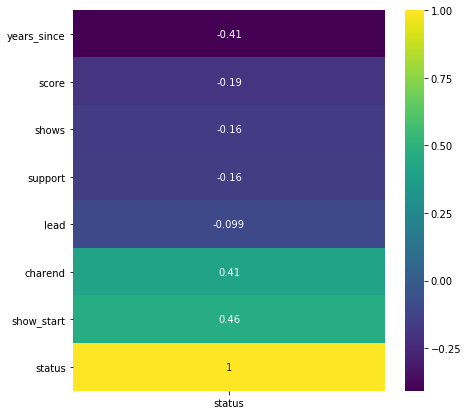

In [198]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr()[['status']].sort_values('status'), annot=True, cmap='viridis')